# iLykei Lecture Series

# Machine Learning

# Large Number of Predictors Workshop

### Yuri Balasanov, Victor Lavrentyev, Mikhail Tselishchev, &copy; iLykei 2017-2024

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Linear-Regression-with-Large-Number-of-Predictors" data-toc-modified-id="Linear-Regression-with-Large-Number-of-Predictors-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Linear Regression with Large Number of Predictors</a></span><ul class="toc-item"><li><span><a href="#Simulation-of-the-data" data-toc-modified-id="Simulation-of-the-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simulation of the data</a></span></li><li><span><a href="#Analysis-of-accuracy-of-inference-as-function-of-number-of-predictors" data-toc-modified-id="Analysis-of-accuracy-of-inference-as-function-of-number-of-predictors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analysis of accuracy of inference as function of number of predictors</a></span></li></ul></li><li><span><a href="#Selecting-predictors-for-regression-problem" data-toc-modified-id="Selecting-predictors-for-regression-problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Selecting predictors for regression problem</a></span><ul class="toc-item"><li><span><a href="#Method-based-on-drop1()" data-toc-modified-id="Method-based-on-drop1()-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Method based on <code>drop1()</code></a></span></li><li><span><a href="#Relative-importance-measures" data-toc-modified-id="Relative-importance-measures-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Relative importance measures</a></span></li><li><span><a href="#Regsubsets" data-toc-modified-id="Regsubsets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Regsubsets</a></span></li><li><span><a href="#Method-of-PCA" data-toc-modified-id="Method-of-PCA-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Method of PCA</a></span></li></ul></li><li><span><a href="#Adding-more-predictors" data-toc-modified-id="Adding-more-predictors-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Adding more predictors</a></span></li></ul></div>

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

In [47]:
plt.rcParams['figure.figsize'] = (8, 6)

In [48]:
import warnings
warnings.filterwarnings('ignore')

#  Linear Regression with Large Number of Predictors     

The goal of this project is to show that large number of predictors can significantly reduce accuracy of inference even if all predictors are statistically significant.     
We also show how traditional methods of predictors selection for linear model fail when number of candidates becomes large.   

## Simulation of the data    

In this experiment simulate a series of nested linear models with large number of independent predictors.    
The model is:
$$Y_{i,j} = \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_j X_{i,j} + \epsilon_i;~~i=1,\ldots,500;~~j=2,\ldots,500. $$

So, the first model of the series, $j=2$ is
$$Y_{i,2} = \beta_0 + \beta_1 X_{i,1} + \beta_2 X_{i,2} + \epsilon_i;~~i=1,\ldots,500.$$

And the last model of the series, $j=500$ is
$$Y_{i,500} = \beta_0 + \beta_1 X_{i,1} + \ldots + \beta_{500} X_{i,500} + \epsilon_i;~~i=1,\ldots,500.$$

All nested models have the same vector of residuals $\epsilon_i;~~i=1,\ldots,500;\epsilon_i \sim Norm(0,1)$.     
All 500 predictors $X_{i,j};~~j=1,\ldots,500$ are independent samples from $Norm(0,2).$     
Slopes of the predictors are randomly selected from uniform distribution on $[1,3]$.    

In [49]:
import numpy as np
import pandas as pd

np.random.seed(12345678)

Epsilon = np.random.normal(0,1, size=500)
colnames = [ "X%i" %(j+1) for j in range(500)]
X = pd.DataFrame(np.random.normal(0,2, size=(500, 500)), columns=colnames)
slopesSet = np.random.uniform(low=1, high=3, size=500)

Y = np.column_stack([1 + np.dot(X.iloc[:, :j], slopesSet[:j]) + Epsilon for j in range(2, 501)])
print(Y.shape)

(500, 499)


In [50]:
print(X.iloc[:6,:5])

         X1        X2        X3        X4        X5
0 -0.303436 -2.934011  3.090174  3.078830 -2.455154
1  1.002622  3.775086 -2.181770 -1.267070 -0.148530
2 -1.825668  0.676276 -1.662627  1.386341  2.161248
3  0.938562  5.339726  0.703560 -0.150732 -0.404267
4  0.338491 -1.202066  3.102574  2.510160 -1.080364
5 -1.490627 -3.080170 -4.736074 -1.397400 -0.163931


In [51]:
print(Y[:6,:5])

[[ -6.26802104  -2.2956028    5.91224918   1.04406128   0.5544628 ]
 [ 11.24315754   8.43849247   5.06061098   4.76609828   4.87618975]
 [ -3.5662229   -5.7035294   -2.00768301   2.27773597   3.05176769]
 [ 14.75959727  15.66402403  15.26218803  14.46058892  13.54481032]
 [  0.60623829   4.59459686  11.28643256   9.1442382    8.61370508]
 [-11.32469123 -17.41291345 -21.13824196 -21.46329187 -17.37978953]]


In [52]:
print(Epsilon[:6])

[ 0.55370819 -1.45963199 -1.29458514 -1.50967395  1.5718749  -0.97569619]


In [53]:
print(slopesSet[:6])

[2.67698203 2.38902873 1.28549979 2.66590009 1.98284422 1.38416219]


By construction all simulated predictors are expected to be significant and uncorrelated.     

## Analysis of accuracy of inference as function of number of predictors    

Check the summaries of the first model in the series and the model 490 of the series.     



Text(0, 0.5, 'P-Value')

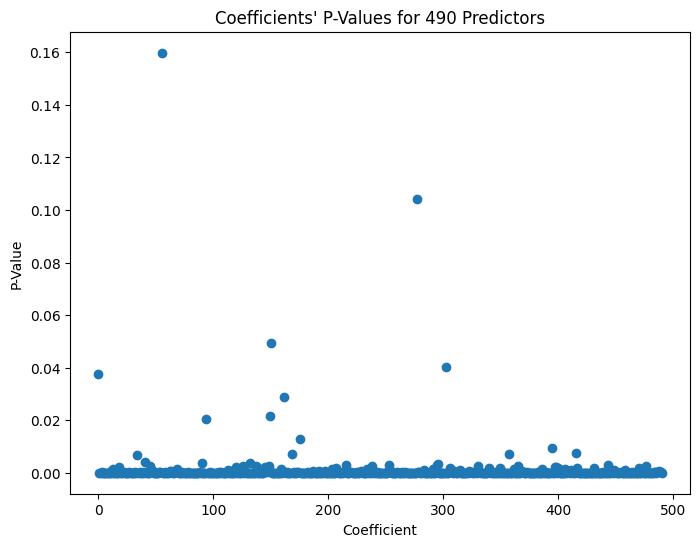

In [54]:
import statsmodels.api as sm

m490 = sm.OLS(Y[:,488], sm.add_constant(X.iloc[:,:490])).fit()
plt.plot(np.arange(491), m490.pvalues, 'o')
plt.title("Coefficients' P-Values for 490 Predictors")
plt.xlabel("Coefficient")
plt.ylabel("P-Value")

In [55]:
m2 = sm.OLS(Y[:,0], sm.add_constant(X.iloc[:,:2])).fit()
print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:04:37   Log-Likelihood:                -701.44
No. Observations:                 500   AIC:                             1409.
Df Residuals:                     497   BIC:                             1422.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0097      0.044     22.824      0.0

Both summaries show pretty strong significance of all predictors and good fits.    
But check 95% confidence intervals for the first predictor $X_{i,1}$ estimated by both models.    


In [56]:
print(tuple(m2.conf_int().loc['X1']))

(2.6438141751731754, 2.733967395446344)


In [57]:
print(tuple(m490.conf_int().loc['X1']))

(2.323327755755881, 3.2994819855467252)


**Explain the difference.**    

Plot $R^2$ returned by all nested models.    


Text(0, 0.5, 'Determination Coefficient')

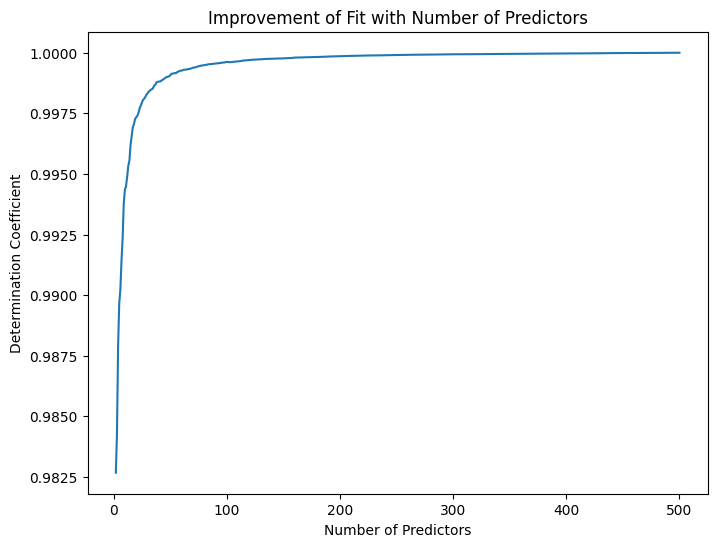

In [58]:
fits = [sm.OLS(Y[:,j-2], sm.add_constant(X.iloc[:,:j])).fit() for j in range(2, 501)]

rSquared = [fit.rsquared for fit in fits] 
plt.plot(range(2, 501), rSquared)
plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Determination Coefficient")

Plot adjusted $R^2$ returned by all nested models.

Text(0, 0.5, 'Adjusted R-Squared')

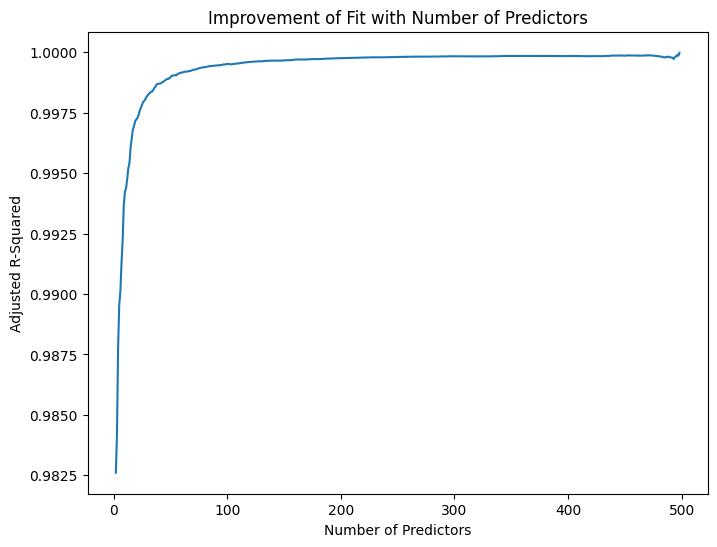

In [59]:
adjustedRSquared = [fit.rsquared_adj for fit in fits]
plt.plot(range(2, 501), adjustedRSquared)
plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Adjusted R-Squared")

Plot confidence intervals returned by all nested models.

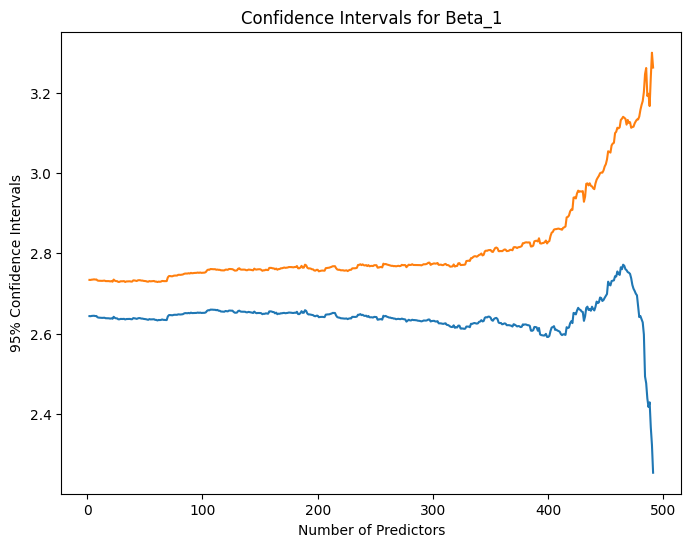

In [60]:
leftConfInt = [fit.conf_int().iloc[1,0] for fit in fits]
rightConfInt = [fit.conf_int().iloc[1,1] for fit in fits]
plt.plot(range(2, 492), leftConfInt[:490])
plt.plot(range(2, 492), rightConfInt[:490])
plt.title("Confidence Intervals for Beta_1")
plt.xlabel("Number of Predictors")
plt.ylabel("95% Confidence Intervals");

Alternatively, you can do the same analysis with a "large model" that is simulated using 500 predictors.    
Add predictors one by one and plot $R^2$ and confidence intervals for $\beta_1$.    


Text(0, 0.5, 'Determination Coefficient')

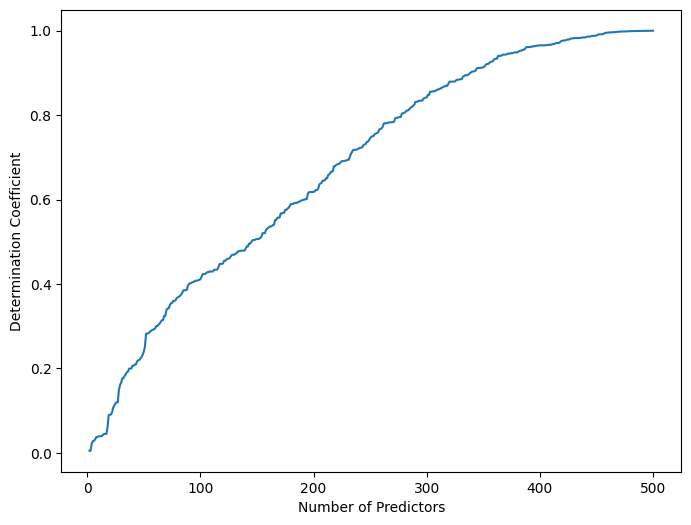

In [61]:
fits500 = [sm.OLS(Y[:,500-2], sm.add_constant(X.iloc[:,:j])).fit() for j in range(2, 501)]

rSquared500 = [fit.rsquared for fit in fits500]
plt.plot(range(2, 501), rSquared500)
plt.xlabel("Number of Predictors")
plt.ylabel("Determination Coefficient")

Text(0, 0.5, '95% Confidence Intervals')

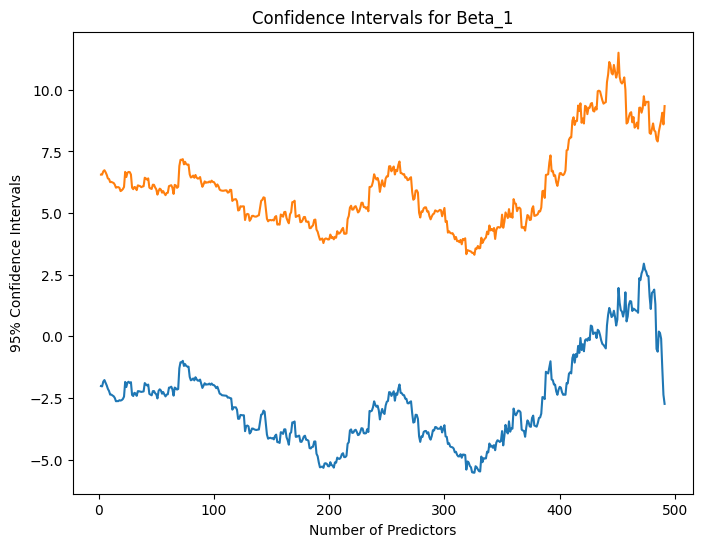

In [62]:
leftConfInt500 = np.array([fit.conf_int().iloc[1,0] for fit in fits500])
rightConfInt500 = np.array([fit.conf_int().iloc[1,1] for fit in fits500])
plt.plot(range(2, 492), leftConfInt500[:490])
plt.plot(range(2, 492), rightConfInt500[:490])
plt.title("Confidence Intervals for Beta_1")
plt.xlabel("Number of Predictors")
plt.ylabel("95% Confidence Intervals")

Confidence interval in this case is so wide that it is not easy to see its dynamics.    
Plot absolute value of its width.   

Text(0, 0.5, 'Width of Confidence Intervals')

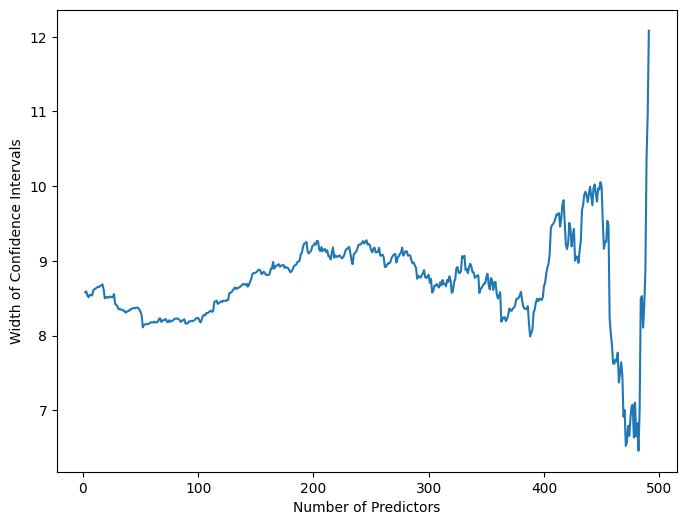

In [63]:
plt.plot(range(2, 492), rightConfInt500[:490] - leftConfInt500[:490])
plt.xlabel("Number of Predictors")
plt.ylabel("Width of Confidence Intervals")

**Conclusions:**    
1. As number of predictors grows the quality of fit expressed as $R^2$ or adjusted $R^2$ continuously improves.    
2. But inference for a fixed predictor becomes less and less accurate, which is shown by the widening confidence interval.     
3. This means that if there is, for example, one significant predictor $X_{i,1}$, by increasing the total number of predictors (even though they all or many of them may be significant) we can damage accuracy of estimation of the slope for $X_{i,1}$.     
4. This example shows one problem that DM has to face, which is not emphasized in traditional courses on statistical analysis where only low numbers of predictors are considered.

# Selecting predictors for regression problem    

## Method based on `drop1()`    

Probably, the main method recommended in textbooks is based on `drop1()` which selects next excluded variable based on `AIC`.      
Apply this method to a typical textbook model dimension, for example, use 10 predictors.

In [64]:
m10 = sm.OLS(Y[:,8], sm.add_constant(X.iloc[:,:10])).fit()
print(m10.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8606.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:05:48   Log-Likelihood:                -699.40
No. Observations:                 500   AIC:                             1421.
Df Residuals:                     489   BIC:                             1467.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0127      0.045     22.645      0.0

In [65]:
def drop1(X,y):
    names = X.columns
    res = pd.DataFrame(index=['RSS','AIC','R-squared'], columns = names)
    lm0 = sm.OLS(y,sm.add_constant(X)).fit()
    res['<None>'] = [lm0.ssr, lm0.aic, lm0.rsquared]
    for c in names:
        lm = sm.OLS(y,sm.add_constant(X[names.drop(c)])).fit()
        res[c] = [lm.ssr, lm.aic, lm.rsquared]
    return res.T.dropna()

drop1_m10 = drop1(X.iloc[:,:10], Y[:,8])
print(drop1_m10)

                 RSS          AIC  R-squared
X1      13460.223133  3085.381574   0.841642
X2      11668.177650  3013.944762   0.862725
X3       3886.087576  2464.213567   0.954280
X4      11541.326634  3008.479231   0.864217
X5       8272.485165  2841.979607   0.902675
X6       4010.234748  2479.937014   0.952820
X7       7267.964966  2777.250289   0.914493
X8       5831.119502  2667.116627   0.931397
X9      14457.705007  3121.125869   0.829906
X10      8741.184610  2869.534983   0.897161
<None>    480.262625  1420.801029   0.994350


In [66]:
bestToDrop = drop1_m10.loc[drop1_m10['AIC'].idxmin()]
print(bestToDrop)

RSS           480.262625
AIC          1420.801029
R-squared       0.994350
Name: <None>, dtype: float64


The decision recommended by the method is not to exclude any predictors.    
This is not surprising: all predictors were used to simulate the model with betas different from zero.    

## Relative importance measures   

Calculate relative importance measures of the model predictors.     


In [67]:
def rel_imp_me(X, y): 
    names = X.columns
    ser = pd.Series(index = names)
    lm0 = sm.OLS(y, sm.add_constant(X)).fit()
    for c in names:
        lm = sm.OLS(y, sm.add_constant(X[names.drop(c)])).fit()
        ser[c] = lm0.rsquared - lm.rsquared 
    res = pd.DataFrame(columns =['last', 'first', 'betasq', 'pratt'], index=names)
    res['last'] = ser
    corr = X.apply(lambda x: np.corrcoef(y,x)[0,1], axis=0)
    res['first'] = corr**2
    sx = X.apply(np.std, axis=0)
    res['betasq'] = (lm0.params[names] * sx / np.std(y))**2
    res['pratt'] = (lm0.params[names] * sx / np.std(y)) * corr
    return res

metrics10 = rel_imp_me(X.iloc[:,:10], Y[:,8])
metrics10

,last,first,betasq,pratt
X1,0.152708,0.251994,0.158449,0.199820
X2,0.131625,0.102708,0.137370,0.118781
X3,0.040069,0.015938,0.040711,0.025472
X4,0.130133,0.085837,0.132500,0.106646
X5,0.091675,0.118474,0.093204,0.105082
X6,0.041530,0.026044,0.042928,0.033437
X7,0.079857,0.101476,0.080784,0.090541
X8,0.062952,0.067679,0.064610,0.066127
X9,0.164444,0.133458,0.175859,0.153199
X10,0.097189,0.090575,0.100155,0.095245


Compare sums of several measures with the $R^2$ of the model with 10 predictors.   

In [68]:
print(metrics10.sum())
print('\nR2 =', m10.rsquared)

last      0.992182
first     0.994182
betasq    1.026570
pratt     0.994350
dtype: float64

R2 = 0.9943497472271303


The goal of each measure is to decompose the total $R^2$ into contributions by different predictors.    

Each measure ranks predictors in the order of their relative importance.   

In [69]:
metrics10_first_rank = metrics10["first"].rank(ascending=False, method='first')
print(metrics10_first_rank)

X1      1.0
X2      4.0
X3     10.0
X4      7.0
X5      3.0
X6      9.0
X7      5.0
X8      8.0
X9      2.0
X10     6.0
Name: first, dtype: float64


In [70]:
metrics10_sort = pd.DataFrame({"Predictors" : metrics10_first_rank.index,
  "Slopes" : slopesSet[:10],
  "Rank" : metrics10_first_rank.values}).sort_values(by="Rank") 
print(metrics10_sort[["Predictors","Slopes"]])

  Predictors    Slopes
0         X1  2.676982
8         X9  2.811744
4         X5  1.982844
1         X2  2.389029
6         X7  1.816513
9        X10  2.190996
3         X4  2.665900
7         X8  1.726208
5         X6  1.384162
2         X3  1.285500


Ranks correspond to the order of the coefficients used in simulation: the larger the coefficient, the higher the rank.     
This is expected: all predictors were simulated as independent samples from the same distribution and mixed with weights equal to the coefficients.     

Compare growth of the determination coefficient in cases of original order of predictors and the improved order.  

In [71]:
orderedPredictors = pd.DataFrame(X, columns=metrics10_sort["Predictors"])
orderedPredictors.shape

(500, 10)

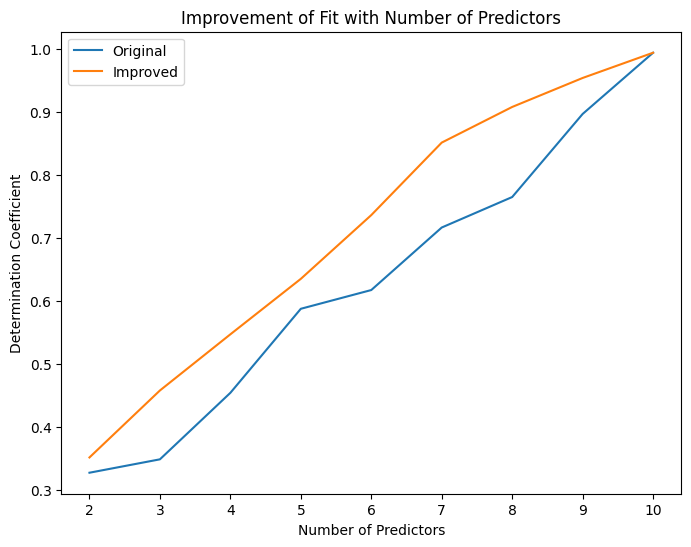

In [72]:
def rSquar(j, y, X) :
    return sm.OLS(y, sm.add_constant(X.iloc[:,:j])).fit().rsquared

originalR2_10 = [rSquar(j,Y[:,8],X) for j in range(2, 11)]
improvedR2_10 = [rSquar(j,Y[:,8],orderedPredictors) for j in range(2, 11)]

plt.plot(range(2, 11), originalR2_10, label="Original")
plt.plot(range(2, 11), improvedR2_10, label="Improved")
plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Determination Coefficient")
plt.legend()

Note that both trajectories have to give the same result when number of predictors is 10.    
But using the improved order high levels of $R^2$ can be achieved much earlier, meaning with fewer predictors.   
The chart can be used to decide how many predictors in the improved order is necessary to achieve the desired level of $R^2$.   

## Regsubsets    

In [73]:
def regsubsets(X,y): 
    names = X.columns
    first = X.apply(lambda x: np.corrcoef(y,x)[0,1] ** 2, axis=0)
    names0 = [first.idxmax()]
    rsq = [first.max()]
    print(0, names0)
    for i in range(names.size-1):
        ser = pd.Series(index=names)
        for s in names.drop(names0):
            lm = sm.OLS(y, sm.add_constant(X[names0 + [s]])).fit()
            ser[s] = lm.rsquared
        names0.append(ser.idxmax())
        rsq.append(ser.max())
        print(i+1, names0)
    return rsq

subsets_rsq = regsubsets(X.iloc[:,:10], Y[:,8]) 

0 ['X1']
1 ['X1', 'X5']
2 ['X1', 'X5', 'X4']
3 ['X1', 'X5', 'X4', 'X9']
4 ['X1', 'X5', 'X4', 'X9', 'X2']
5 ['X1', 'X5', 'X4', 'X9', 'X2', 'X10']
6 ['X1', 'X5', 'X4', 'X9', 'X2', 'X10', 'X7']
7 ['X1', 'X5', 'X4', 'X9', 'X2', 'X10', 'X7', 'X8']
8 ['X1', 'X5', 'X4', 'X9', 'X2', 'X10', 'X7', 'X8', 'X6']
9 ['X1', 'X5', 'X4', 'X9', 'X2', 'X10', 'X7', 'X8', 'X6', 'X3']


Relative importance of predictors can be obtained from the last line above.

Compare the selected order with `metrics10_first_rank`.

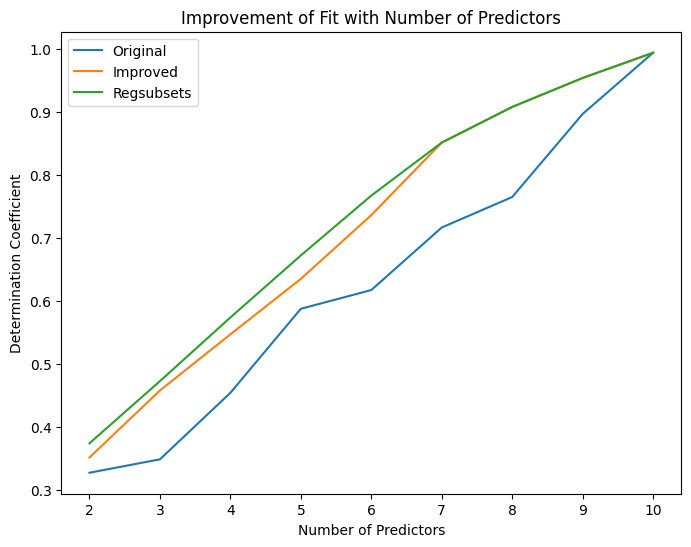

In [74]:
plt.plot(range(2, 11), originalR2_10, label="Original")
plt.plot(range(2, 11), improvedR2_10, label="Improved")
plt.plot(range(2, 11), subsets_rsq[1:], label="Regsubsets")

plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Determination Coefficient")
plt.legend()

## Method of PCA

To solve linear regression problem using the PCA method replace the original 10 predictors with their principal components.

In [75]:
from sklearn.decomposition import PCA

nFactors = 10

xPCA = PCA(n_components=nFactors)
xPCA.fit(X.iloc[:,:10])
xPCA_importance = pd.DataFrame({'Standard deviation': np.sqrt(xPCA.explained_variance_),
                               'Proportion of Variance': xPCA.explained_variance_ratio_,
                               'Cumulative Proportion': np.cumsum(xPCA.explained_variance_ratio_)},
                               columns=['Standard deviation','Proportion of Variance','Cumulative Proportion'],
                               index=[ "PC%i" %(j+1) for j in range(nFactors)])
print(xPCA_importance.T)

                             PC1       PC2       PC3       PC4       PC5  \
Standard deviation      2.188260  2.160116  2.099138  2.027551  2.014671   
Proportion of Variance  0.125749  0.122535  0.115714  0.107957  0.106589   
Cumulative Proportion   0.125749  0.248284  0.363998  0.471955  0.578544   

                             PC6       PC7       PC8       PC9      PC10  
Standard deviation      1.959567  1.849167  1.803684  1.723923  1.601388  
Proportion of Variance  0.100838  0.089796  0.085433  0.078044  0.067344  
Cumulative Proportion   0.679382  0.769179  0.854612  0.932656  1.000000  


Text(0, 0.5, 'Explained Variance (%)')

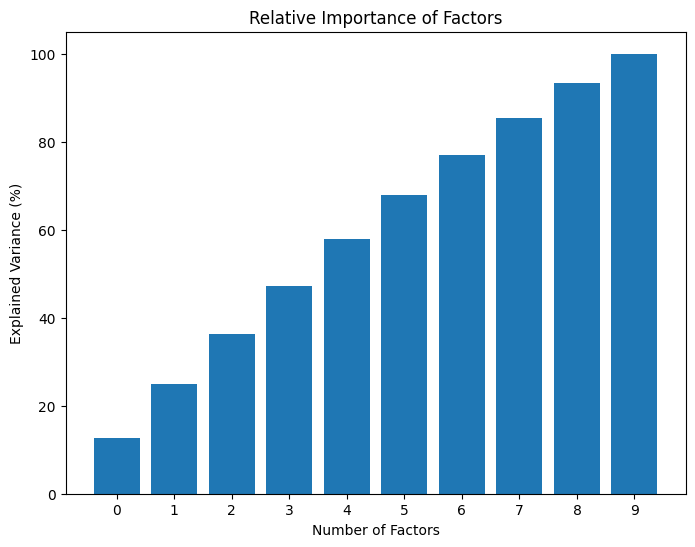

In [76]:
fig, ax = plt.subplots()
x_pos = np.arange(len(xPCA_importance['Cumulative Proportion']))
ax.bar(x_pos, 100 * xPCA_importance['Cumulative Proportion'], align='center')
ax.set_xticks(x_pos)
plt.title('Relative Importance of Factors')
plt.xlabel('Number of Factors')
plt.ylabel('Explained Variance (%)')

**Give interpretation of `xPCA_importance`. What does importance mean?**    

Not surprisingly, dimensionality of this set of predictors cannot be reduced without significant loss of explanatory power: predictors are simulated as independent variables.     

**But motivation behind using PCA regression is not selection of fewer predictors based on PCA decomposition.**     

**PCA decomposition does not know and does not take into account ability of principal components to explain the output.**    

Instead PCA replaces all original predictors with PCA factors in order to make selection by traditional methods, like `drop1()`, `regsubsets` or  `rel_imp_me`, more efficient.   

Select all 10 PCA factors as new predictors.    
Define `factorLoadings`, `factorScores`, `zeroLoading`.


In [77]:
factorLoadings = pd.DataFrame(xPCA.components_,
                              columns=["X%i" %(j+1) for j in range(10)],
                              index=["PC%i" %(j+1) for j in range(nFactors)])
#print(factorLoadings.T)
factorScores = pd.DataFrame(np.dot(X.iloc[:,:10], xPCA.components_.T), columns =["PC%i"%(j+1) for j in range(nFactors)])
print('factorScores.shape =', factorScores.shape)
print(factorScores[:6])
zeroLoading = xPCA.mean_
print('\nZero loading:')
print(zeroLoading)

factorScores.shape = (500, 10)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.899166 -1.653209 -3.691494  3.560813  1.427703 -0.587360 -2.547053   
1 -3.226432 -2.067393  1.897952 -2.974665  0.536831 -0.518284 -0.433409   
2 -3.470136  2.224202 -3.016305  0.948732  0.333956  2.309476 -1.286367   
3 -3.401784 -2.799346  2.131912  1.088627  2.081731  1.559329 -0.006420   
4  2.366563 -0.533871 -0.458769  1.561180  0.367633  0.301147  2.263253   
5  1.177848  0.607025 -2.687240 -4.798879 -2.636049 -3.195747 -1.068586   

        PC8       PC9      PC10  
0 -1.374249  2.008396 -0.658782  
1  0.652011 -1.537480  0.839794  
2  1.336182  0.067876  1.305531  
3  1.660299  0.320463  0.455779  
4 -2.027055  2.946388  0.452066  
5  2.810120 -1.371671 -1.631815  

Zero loading:
[ 1.27542056e-01 -9.88346163e-05  1.40617740e-01 -2.80453416e-02
 -6.33194765e-02  6.50336558e-02 -3.46576240e-04  1.15787641e-01
 -4.64202271e-02  1.04658641e-01]


In [78]:
# Check that factors are uncorrelated
factorScores.cov()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
PC1,4.788483e+00,-1.003873e-15,-2.007746e-15,1.035912e-15,-9.753943e-16,-1.922310e-15,-1.737199e-15,-2.209767e-15,6.834880e-16,3.844620e-16
PC2,-1.003873e-15,4.666103e+00,-1.366976e-15,8.401207e-16,9.184370e-16,1.423933e-15,1.851113e-16,1.381215e-15,-1.637523e-16,-7.119667e-16
PC3,-2.007746e-15,-1.366976e-15,4.406382e+00,9.967533e-16,9.469157e-16,-1.637523e-16,-1.423933e-16,-1.050596e-15,0.000000e+00,1.416814e-15
PC4,1.035912e-15,8.401207e-16,9.967533e-16,4.110962e+00,-4.129407e-16,-1.253061e-15,-7.404453e-16,1.310019e-15,2.847867e-17,7.119667e-16
PC5,-9.753943e-16,9.184370e-16,9.469157e-16,-4.129407e-16,4.058897e+00,-8.828387e-16,8.543600e-17,-8.543600e-17,2.135900e-16,8.543600e-16
PC6,-1.922310e-15,1.423933e-15,-1.637523e-16,-1.253061e-15,-8.828387e-16,3.839902e+00,-4.574386e-16,7.119667e-17,-6.710286e-16,3.533135e-16
PC7,-1.737199e-15,1.851113e-16,-1.423933e-16,-7.404453e-16,8.543600e-17,-4.574386e-16,3.419420e+00,-1.352737e-15,-4.556587e-16,9.682747e-16
PC8,-2.209767e-15,1.381215e-15,-1.050596e-15,1.310019e-15,-8.543600e-17,7.119667e-17,-1.352737e-15,3.253275e+00,5.197357e-16,1.484451e-15
PC9,6.834880e-16,-1.637523e-16,0.000000e+00,2.847867e-17,2.135900e-16,-6.710286e-16,-4.556587e-16,5.197357e-16,2.971911e+00,-9.540353e-16
PC10,3.844620e-16,-7.119667e-16,1.416814e-15,7.119667e-16,8.543600e-16,3.533135e-16,9.682747e-16,1.484451e-15,-9.540353e-16,2.564444e+00


Create data frame with factors as predictors.    
Fit linear model using PCA factors as predictors.

In [79]:
m10_PCA = sm.OLS(Y[:,8], sm.add_constant(factorScores)).fit()
print(m10_PCA.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     8606.
Date:                Sun, 06 Oct 2024   Prob (F-statistic):               0.00
Time:                        15:05:49   Log-Likelihood:                -699.40
No. Observations:                 500   AIC:                             1421.
Df Residuals:                     489   BIC:                             1467.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0127      0.045     22.645      0.0

Rank and order PCA factors as predictors using relative importance measures.

In [80]:
metrics_PCA = rel_imp_me(factorScores, Y[:,8])
print(metrics_PCA)

          last     first    betasq     pratt
PC1   0.046051  0.046051  0.046051  0.046051
PC2   0.131639  0.131639  0.131639  0.131639
PC3   0.126976  0.126976  0.126976  0.126976
PC4   0.000053  0.000053  0.000053  0.000053
PC5   0.267827  0.267827  0.267827  0.267827
PC6   0.071394  0.071394  0.071394  0.071394
PC7   0.037802  0.037802  0.037802  0.037802
PC8   0.047984  0.047984  0.047984  0.047984
PC9   0.092139  0.092139  0.092139  0.092139
PC10  0.172484  0.172484  0.172484  0.172484


In [81]:
print(pd.DataFrame({"sum_PCA_first" : [sum(metrics_PCA["first"])],
                    "sum_PCA_last" : [sum(metrics_PCA["last"])],
                    "m10_PCA_R2" : [m10_PCA.rsquared]}))

   sum_PCA_first  sum_PCA_last  m10_PCA_R2
0        0.99435       0.99435     0.99435


**Using PCA factors as predictors makes all measures equivalent.**    

This is because PCA factors are orthogonal by construction, $R^2$ is perfectly decomposable by any measure.    
Note that relative importance of PCA factors for explanation of the output is not equivalent to relative importance of them for explanation of the set of original predictors.    

Reorder the PCA factors according to their relative importance as predictors explaining the output and calculate the $R^2$ sequence.     
Since all measures are now equivalent after replacing the original predictors with PCA factors, we can select the fastest measure, for example, `first`.     


In [82]:
first_PCA_rank = metrics_PCA["first"].rank(ascending=False, method='first')
print(first_PCA_rank)

PC1      8.0
PC2      3.0
PC3      4.0
PC4     10.0
PC5      1.0
PC6      6.0
PC7      9.0
PC8      7.0
PC9      5.0
PC10     2.0
Name: first, dtype: float64


In [83]:
metrics_PCA_sort = pd.DataFrame({"Factors" : first_PCA_rank.index,
                                 "Rank" : first_PCA_rank.values}).sort_values(by="Rank") 
print(list(metrics_PCA_sort["Factors"]))

['PC5', 'PC10', 'PC2', 'PC3', 'PC9', 'PC6', 'PC8', 'PC1', 'PC7', 'PC4']


In [84]:
print(factorScores[:6])
orderedFactors = pd.DataFrame(factorScores, columns= metrics_PCA_sort["Factors"])
print(orderedFactors[:6])

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  1.899166 -1.653209 -3.691494  3.560813  1.427703 -0.587360 -2.547053   
1 -3.226432 -2.067393  1.897952 -2.974665  0.536831 -0.518284 -0.433409   
2 -3.470136  2.224202 -3.016305  0.948732  0.333956  2.309476 -1.286367   
3 -3.401784 -2.799346  2.131912  1.088627  2.081731  1.559329 -0.006420   
4  2.366563 -0.533871 -0.458769  1.561180  0.367633  0.301147  2.263253   
5  1.177848  0.607025 -2.687240 -4.798879 -2.636049 -3.195747 -1.068586   

        PC8       PC9      PC10  
0 -1.374249  2.008396 -0.658782  
1  0.652011 -1.537480  0.839794  
2  1.336182  0.067876  1.305531  
3  1.660299  0.320463  0.455779  
4 -2.027055  2.946388  0.452066  
5  2.810120 -1.371671 -1.631815  
Factors       PC5      PC10       PC2       PC3       PC9       PC6       PC8  \
0        1.427703 -0.658782 -1.653209 -3.691494  2.008396 -0.587360 -1.374249   
1        0.536831  0.839794 -2.067393  1.897952 -1.537480 -0.518284  0.652

In [85]:
orderedLoadings = pd.DataFrame(factorLoadings.T,  columns= metrics_PCA_sort["Factors"])
print(orderedLoadings)
orderedPCA_R2 = [rSquar(j,Y[:,8], orderedFactors) for j in range(2,11)]
print('\nOrdered PCA R-squared:')
print(orderedPCA_R2)

Factors       PC5      PC10       PC2       PC3       PC9       PC6       PC8  \
X1       0.638317 -0.408265  0.144395  0.381515  0.229100 -0.243481 -0.303138   
X2       0.144939  0.338307 -0.410738  0.502243  0.065849  0.238168  0.341888   
X3       0.280527  0.011697 -0.377939  0.071659  0.096958  0.545919 -0.296250   
X4      -0.093316  0.326111 -0.025771 -0.240005  0.848326 -0.106838 -0.199839   
X5      -0.262202 -0.181167  0.467748  0.178850  0.145110  0.685707 -0.031996   
X6       0.431198  0.294998  0.149451 -0.197543  0.106872  0.043041  0.531460   
X7       0.257704 -0.010095  0.450381  0.024629  0.014272  0.033332  0.349957   
X8       0.246354  0.252766  0.325949 -0.293123 -0.073504  0.219435 -0.256747   
X9      -0.145255  0.576982  0.335473  0.548391 -0.118911 -0.212746 -0.277838   
X10      0.285058  0.309252 -0.064736 -0.284939 -0.402362  0.089339 -0.338325   

Factors       PC1       PC7       PC4  
X1      -0.121547 -0.033660 -0.199747  
X2      -0.504260  0.106065 

Compare the sequence of determination coefficients with the sequences obtained by other methods.

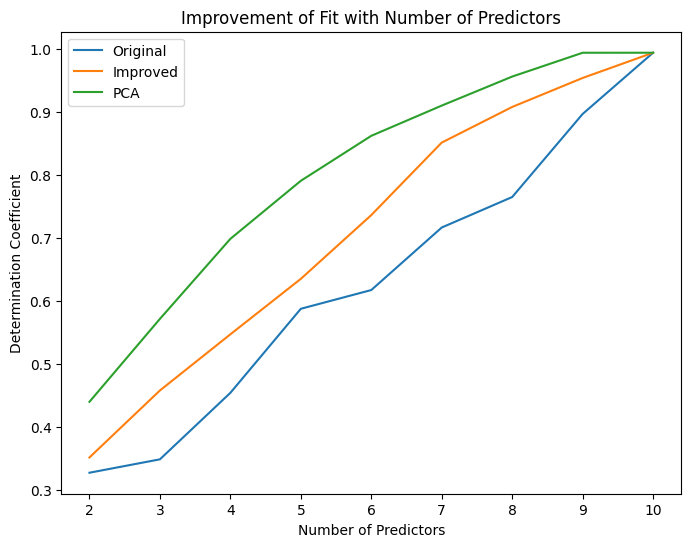

In [86]:
plt.plot(range(2,11), originalR2_10, label="Original")
plt.plot(range(2,11), improvedR2_10, label="Improved")
plt.plot(range(2,11), orderedPCA_R2, label="PCA")
plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Determination Coefficient")
plt.legend()

Replacement of the original predictors with PCA factors made significant improvement by achieving higher $R^2$ using fewer predictor variables.

After fitting regression model with PCA factors as predictors we may need sometimes to recalculate coefficients into regression coefficients for the original predictors.
Do it using formulas derived in the lecture.

If $\beta_f$ is vector of slopes of the model based on factors as predictors and $\beta$ is vector of slopes of the model with original predictors then 
$$\beta=L\beta_f,$$
where columns of $L$ and elements of $\beta_f$ are ordered in order of relative importance of PCA factors as predictors for the response.

Factor loadings and PCA regression coefficients must be reordered.

In [87]:
print(m10_PCA.params[1:nFactors+1])

PC1    -1.279902
PC2     2.192153
PC3     2.215519
PC4     0.046870
PC5     3.352573
PC6     1.779618
PC7    -1.372253
PC8    -1.585046
PC9     2.298050
PC10    3.384802
dtype: float64


In [88]:
coefficients_m10_PCA = pd.DataFrame(m10_PCA.params[1:nFactors+1], columns= ["Coefficients"] )
coefficients_m10_PCA["Rank"] = first_PCA_rank.values
coefficients_m10_PCA = coefficients_m10_PCA.sort_values(by="Rank")
print(coefficients_m10_PCA["Coefficients"])

PC5     3.352573
PC10    3.384802
PC2     2.192153
PC3     2.215519
PC9     2.298050
PC6     1.779618
PC8    -1.585046
PC1    -1.279902
PC7    -1.372253
PC4     0.046870
Name: Coefficients, dtype: float64


Find restored slopes:

In [89]:
restoredSlopes = np.dot(orderedLoadings, coefficients_m10_PCA["Coefficients"])
print(pd.DataFrame( [restoredSlopes, slopesSet[:10]], columns=["X%i"%(j+1) for j in range(10)]).T)

            0         1
X1   2.685963  2.676982
X2   2.375971  2.389029
X3   1.282827  1.285500
X4   2.698800  2.665900
X5   1.990128  1.982844
X6   1.380532  1.384162
X7   1.834603  1.816513
X8   1.721775  1.726208
X9   2.839142  2.811744
X10  2.201880  2.190996


The model reconstructer the slopes used in simulation.    

# Adding more predictors

Previous section is a review of predictors selection in a traditional statistical analysis course, plus the method `regsubsets()` recommended in the book.        
In order to understand the the problems that need to be solved in modern data mining do the following:    

* If necessary, rearrange calculations into a script or a function that takes the simulated data and runs predictors selection for a given set of predictors using the following methods:  `first`, `last` and `resubsets()`.    
For example, for 50 predictors use the output `Y[:,48]` and predictors `X.iloc[:,:50]`.     
* Run each method with increasing number of predictors and create a report with the largest number of predictors you are able to obtain.   
For example, add 10 predictors at a time.    
If you are able to run the problem with 490 or so predictors then the method is suitable for solving a machine learning problem in R.    

Which of the methods covered so far you prefer?     

**Recommendations:**     
Turn off all unnecessary applications on your computer, save all unsaved files.    
Be prepared for a frustrating experience. You may be pushing your hardware to a limit.    
Good luck.  

In [90]:
import time

def run_first_last(X, Y, num_predictors):
    metrics = rel_imp_me(X.iloc[:,:num_predictors], Y[:,num_predictors-2])
    metrics_first_rank = metrics["first"].rank(ascending=False, method='first')
    metrics_last_rank = metrics["last"].rank(ascending=False, method='first')
    
    metrics_first_sort = pd.DataFrame({"Predictors" : metrics_first_rank.index,
        "Slopes" : slopesSet[:num_predictors],
        "Rank" : metrics_first_rank.values}).sort_values(by="Rank") 
    
    metrics_last_sort = pd.DataFrame({"Predictors" : metrics_last_rank.index,
        "Slopes" : slopesSet[:num_predictors],
        "Rank" : metrics_last_rank.values}).sort_values(by="Rank") 
    
    orderedPredictors_first = pd.DataFrame(X, columns=metrics_first_sort["Predictors"])
    orderedPredictors_last = pd.DataFrame(X, columns=metrics_last_sort["Predictors"])
    
    return orderedPredictors_first, orderedPredictors_last

In [91]:
def run_regsubsets(X, Y, num_predictors):
    rsq = regsubsets(X.iloc[:,:num_predictors], Y[:,num_predictors-2])
    return rsq

In [92]:
num_predictors = 50

In [93]:
orderedPredictors_first, orderedPredictors_last = run_first_last(X, Y, num_predictors)

In [94]:
subsets_rsq = run_regsubsets(X, Y, num_predictors)

0 ['X38']
1 ['X38', 'X36']
2 ['X38', 'X36', 'X1']
3 ['X38', 'X36', 'X1', 'X23']
4 ['X38', 'X36', 'X1', 'X23', 'X17']
5 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15']
6 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26']
7 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31']
8 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50']
9 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16']
10 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16', 'X19']
11 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16', 'X19', 'X29']
12 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16', 'X19', 'X29', 'X4']
13 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16', 'X19', 'X29', 'X4', 'X9']
14 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16', 'X19', 'X29', 'X4', 'X9', 'X47']
15 ['X38', 'X36', 'X1', 'X23', 'X17', 'X15', 'X26', 'X31', 'X50', 'X16', 'X19', 'X29', 'X4', 'X9', 'X47', 'X25']
16 ['X38', 'X36

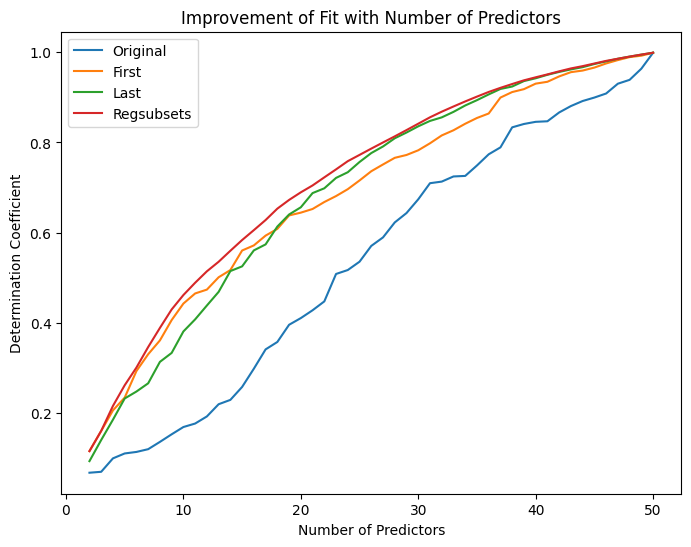

In [95]:
originalR2_10 = [rSquar(j,Y[:,num_predictors-2],X) for j in range(2, num_predictors+1)]
firstR2 = [rSquar(j,Y[:,num_predictors-2],orderedPredictors_first) for j in range(2, num_predictors+1)]
lastR2 = [rSquar(j,Y[:,num_predictors-2],orderedPredictors_last) for j in range(2, num_predictors+1)]
plt.plot(range(2, num_predictors+1), originalR2_10, label="Original")
plt.plot(range(2, num_predictors+1), firstR2, label="First")
plt.plot(range(2, num_predictors+1), lastR2, label="Last")
plt.plot(range(2, num_predictors+1), subsets_rsq[1:], label="Regsubsets")
plt.title("Improvement of Fit with Number of Predictors")
plt.xlabel("Number of Predictors")
plt.ylabel("Determination Coefficient")
plt.legend()

In [96]:
import os

In [97]:
data_path = "data"

In [98]:
data = pd.read_csv(os.path.join(data_path,"test_sample.csv"))

In [99]:
data.keys()

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X482', 'X483', 'X484', 'X485', 'X486', 'X487', 'X488', 'X489', 'X490',
       'X491'],
      dtype='object', length=492)

In [100]:
Y = data['Y']
X = data.drop(columns=['Y'])

In [101]:
Y[:8]

0     32.106904
1    -85.098683
2    -59.350167
3     12.564974
4   -111.825294
5    105.925089
6     42.263985
7     -9.803136
Name: Y, dtype: float64

In [102]:
X.iloc[:, :10]

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,0.047325,-0.840102,-1.345293,0.665238,0.135475,0.666804,1.194558,-1.319275,-2.038303,-0.536253
1,2.338110,-2.612954,2.235200,3.145341,-1.810857,0.993020,2.155864,3.642793,-2.651125,3.171222
2,-0.360458,4.478361,1.008678,1.863475,-1.498103,0.698740,-2.827697,-0.202936,0.399735,-1.964439
3,1.255347,-4.223355,-0.991540,-1.496282,-3.826177,-0.578921,-0.986333,-0.171464,0.372290,3.018272
4,2.047050,-0.142175,0.069786,0.065946,4.428705,-1.975119,1.431274,-0.709535,-1.190550,0.587200
...,...,...,...,...,...,...,...,...,...,...
495,-0.015717,2.906228,-1.918918,0.881567,1.519568,0.569618,-0.641533,0.105345,0.819023,-4.610228
496,0.009369,-1.950510,1.813352,-3.910313,-0.551892,-2.357677,2.241032,3.961444,-1.825582,-1.995084
497,-1.924750,-1.700846,-1.595396,0.204241,-0.377565,-0.411655,1.304295,1.022072,-0.108435,-0.135260
498,-2.490248,-1.439133,0.692742,-2.956699,-1.342850,-3.532759,4.303827,1.841076,-0.246216,-1.469736


In [103]:
lm = sm.OLS(Y, sm.add_constant(X.iloc[:,:100])).fit()
lm.rsquared

np.float64(0.33757342474647134)

In [104]:
import time

In [105]:
for j in range(50, 401, 50):
    start_time = time.time()
    lm = sm.OLS(Y, sm.add_constant(X.iloc[:,:j])).fit()
    end_time = time.time()
    print(f"R2 for {j} predictors: {lm.rsquared}, Time taken: {end_time - start_time:.2f} seconds")

R2 for 50 predictors: 0.183737992287907, Time taken: 0.01 seconds
R2 for 100 predictors: 0.33757342474647134, Time taken: 0.02 seconds
R2 for 150 predictors: 0.5139860115670969, Time taken: 0.02 seconds
R2 for 200 predictors: 0.6026750473127599, Time taken: 0.03 seconds
R2 for 250 predictors: 0.6906330445968984, Time taken: 0.04 seconds
R2 for 300 predictors: 0.7857633209568842, Time taken: 0.06 seconds
R2 for 350 predictors: 0.8856267098676414, Time taken: 0.09 seconds
R2 for 400 predictors: 0.9516909731364753, Time taken: 0.11 seconds


In [106]:
for j in range(300, 401, 10):
    start_time = time.time()
    lm = sm.OLS(Y, sm.add_constant(X.iloc[:,:j])).fit()
    end_time = time.time()
    print(f"R2 for {j} predictors: {lm.rsquared}, Time taken: {end_time - start_time:.2f} seconds")

R2 for 300 predictors: 0.7857633209568842, Time taken: 0.10 seconds
R2 for 310 predictors: 0.7990889170377721, Time taken: 0.08 seconds
R2 for 320 predictors: 0.8083721224517144, Time taken: 0.07 seconds
R2 for 330 predictors: 0.8491882947682248, Time taken: 0.08 seconds
R2 for 340 predictors: 0.8612832694046793, Time taken: 0.11 seconds
R2 for 350 predictors: 0.8856267098676414, Time taken: 0.08 seconds
R2 for 360 predictors: 0.9000624318130107, Time taken: 0.08 seconds
R2 for 370 predictors: 0.9155349663560891, Time taken: 0.09 seconds
R2 for 380 predictors: 0.9273033683306304, Time taken: 0.10 seconds
R2 for 390 predictors: 0.939571092035262, Time taken: 0.11 seconds
R2 for 400 predictors: 0.9516909731364753, Time taken: 0.11 seconds


In [107]:
n_orig = 0
for j in range(350, 365):
    start_time = time.time()
    lm = sm.OLS(Y, sm.add_constant(X.iloc[:,:j])).fit()
    if lm.rsquared > 0.9 and n_orig == 0:
        n_orig = j
    end_time = time.time()
    print(f"R2 for {j} predictors: {lm.rsquared}, Time taken: {end_time - start_time:.2f} seconds")

R2 for 350 predictors: 0.8856267098676414, Time taken: 0.11 seconds
R2 for 351 predictors: 0.8857324805898141, Time taken: 0.09 seconds
R2 for 352 predictors: 0.885799092117212, Time taken: 0.10 seconds
R2 for 353 predictors: 0.8873522342193098, Time taken: 0.10 seconds
R2 for 354 predictors: 0.887367352403488, Time taken: 0.09 seconds
R2 for 355 predictors: 0.891109734937396, Time taken: 0.09 seconds
R2 for 356 predictors: 0.8911100388221741, Time taken: 0.08 seconds
R2 for 357 predictors: 0.8951851500528283, Time taken: 0.10 seconds
R2 for 358 predictors: 0.8998043209986207, Time taken: 0.09 seconds
R2 for 359 predictors: 0.9000219053221528, Time taken: 0.10 seconds
R2 for 360 predictors: 0.9000624318130107, Time taken: 0.09 seconds
R2 for 361 predictors: 0.9005950029862146, Time taken: 0.08 seconds
R2 for 362 predictors: 0.9015123636079755, Time taken: 0.09 seconds
R2 for 363 predictors: 0.9019525509817495, Time taken: 0.08 seconds
R2 for 364 predictors: 0.9031503985539213, Time tak

In [108]:
n_orig

359

## The answer for step 1: 359

In [151]:
xPCA = PCA(n_components=X.shape[1])
xPCA.fit(X)

factorScores = pd.DataFrame(np.dot(X, xPCA.components_.T), columns =["PC%i"%(k+1) for k in range(X.shape[1])])

metrics_PCA = rel_imp_me(factorScores, Y)

first_PCA_rank = metrics_PCA["first"].rank(ascending=False, method='first')
metrics_PCA_sort = pd.DataFrame({"Factors" : first_PCA_rank.index,
                                 "Rank" : first_PCA_rank.values}).sort_values(by="Rank") 

orderedFactors = pd.DataFrame(factorScores, columns= metrics_PCA_sort["Factors"])


In [153]:
for j in range(10, 401, 10):
    start_time = time.time()
    lm = sm.OLS(Y, sm.add_constant(orderedFactors.iloc[:,:j])).fit()
    end_time = time.time()
    print(f"R2 for {j} predictors: {lm.rsquared}, Time taken: {end_time - start_time:.2f} seconds")

R2 for 10 predictors: 0.2551611870229322, Time taken: 0.00 seconds
R2 for 20 predictors: 0.37728841243076483, Time taken: 0.00 seconds
R2 for 30 predictors: 0.4764687130477142, Time taken: 0.04 seconds
R2 for 40 predictors: 0.5547231641363226, Time taken: 0.01 seconds
R2 for 50 predictors: 0.6203199922779179, Time taken: 0.01 seconds
R2 for 60 predictors: 0.6727461960750941, Time taken: 0.01 seconds
R2 for 70 predictors: 0.7156401512817065, Time taken: 0.01 seconds
R2 for 80 predictors: 0.7509221439470847, Time taken: 0.02 seconds
R2 for 90 predictors: 0.7817016757209856, Time taken: 0.01 seconds
R2 for 100 predictors: 0.8087662546989509, Time taken: 0.01 seconds
R2 for 110 predictors: 0.8325721374272076, Time taken: 0.02 seconds
R2 for 120 predictors: 0.8532772225196714, Time taken: 0.02 seconds
R2 for 130 predictors: 0.8711747965968841, Time taken: 0.02 seconds
R2 for 140 predictors: 0.8864146794190152, Time taken: 0.02 seconds
R2 for 150 predictors: 0.9002229658688764, Time taken: 0

In [155]:
n_PCA = 0
for j in range(140, 151):
    start_time = time.time()
    lm = sm.OLS(Y, sm.add_constant(orderedFactors.iloc[:,:j])).fit()
    if lm.rsquared > 0.9 and n_PCA == 0:
        n_PCA = j
    end_time = time.time()
    print(f"R2 for {j} predictors: {lm.rsquared}, Time taken: {end_time - start_time:.2f} seconds")

R2 for 140 predictors: 0.8864146794190152, Time taken: 0.11 seconds
R2 for 141 predictors: 0.887835956906325, Time taken: 0.03 seconds
R2 for 142 predictors: 0.8892567051091296, Time taken: 0.02 seconds
R2 for 143 predictors: 0.8906660908926353, Time taken: 0.02 seconds
R2 for 144 predictors: 0.892068249720851, Time taken: 0.02 seconds
R2 for 145 predictors: 0.8934698750437373, Time taken: 0.03 seconds
R2 for 146 predictors: 0.8948598029394046, Time taken: 0.02 seconds
R2 for 147 predictors: 0.8962309098255, Time taken: 0.02 seconds
R2 for 148 predictors: 0.8975995830248379, Time taken: 0.03 seconds
R2 for 149 predictors: 0.8989275078202412, Time taken: 0.03 seconds
R2 for 150 predictors: 0.9002229658688764, Time taken: 0.03 seconds


## The answer for step 2: 150

In [156]:
n_orig - n_PCA

209

In [157]:
print(f"{0.9002229658688764:.5f}")

0.90022
